In [1]:
# IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# OPEN AND PREPARE DATA

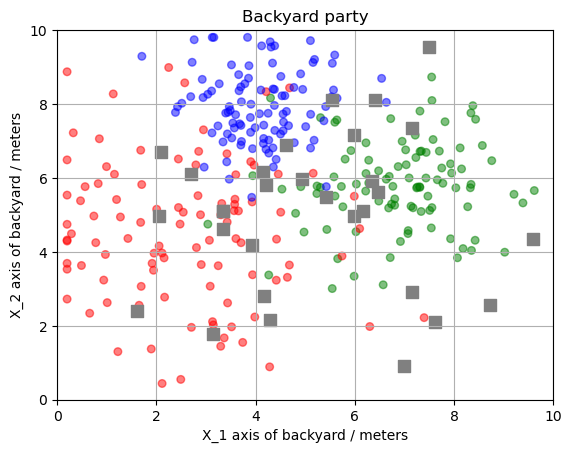

In [12]:
# KNOWN DATA
fn_features = 'backyard_party.csv'
df = pd.read_csv(fn_features, usecols = [1,2,3])
data = df.to_numpy(dtype = object)

# now put into X and y
X = data[:,0:2]
y = data[:,2]

# UNKNOWN DATA
fn_new_data = 'backyard_party_new_friends.csv'
df_nd = pd.read_csv(fn_new_data, usecols = [1,2])

# now make a new X variable for the unknown data
X_new = df_nd.to_numpy(dtype = object)

# now plot the data to look at
plt.figure()

plt.scatter(X[:,0],X[:,1],c = y, s = 30, alpha = 0.5)
plt.scatter(X_new[:,0],X_new[:,1],c = 'gray', s = 70, marker = 's')

plt.xlim([0,10])
plt.ylim([0,10])

plt.title('Backyard party')

plt.xlabel('X_1 axis of backyard / meters')
plt.ylabel('X_2 axis of backyard / meters')

plt.grid()
plt.show()

# SPLIT DATASET

Here we split the dataset into training and testing.

In [13]:
# code to split data goes here
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state = 42)

### Exercise 1:

Using the Iris dataset, create the training and testing subsets where the testing is made up of 25% of the total dataset.

In [15]:
# load data here
from sklearn.datasets import load_iris

iris = load_iris()

# get features (X) and labels (y)
X,y = iris.data, iris.target

# split data here
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, shuffle = True, random_state = 42)

# APPLY KNN!

Apply the K-Nearest Neighbours classification algorithm so that we can calculate accuracy metrics.

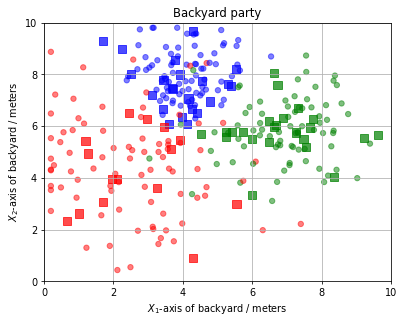

In [19]:
# code for KNN goes here
from sklearn.neighbors import KNeighborsClassifier

# KNOWN DATA
fn_features = 'backyard_party.csv'
df = pd.read_csv(fn_features, usecols = [1,2,3])
data = df.to_numpy(dtype = object)

# now put into X and y
X = data[:,0:2]
y = data[:,2]

# UNKNOWN DATA
fn_new_data = 'backyard_party_new_friends.csv'
df_nd = pd.read_csv(fn_new_data, usecols = [1,2])

# now make a new X variable for the unknown data
X_new = df_nd.to_numpy(dtype = object)

# split data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state = 42)

# define the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

# train the model
knn.fit(X_train, y_train)

# make predictions on TEST set
y_pred = knn.predict(X_test)


# here is the plotting code for you
plt.figure(dpi = 70)

# Create the scatter plot with custom colors
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred, marker = 's', s = 70, alpha = 0.7)
plt.scatter(X_train[:,0],X_train[:,1],c = y_train, s = 30, alpha = 0.5)

# Add labels and title
plt.xlabel(r'$X_1$-axis of backyard / meters')
plt.ylabel(r'$X_2$-axis of backyard / meters')
plt.title('Backyard party')

plt.xlim([0,10]);plt.ylim([0,10])

plt.grid()
plt.show()

# ACCURACY METRICS

This is to get an estimation of the performance of the KNN model.

In [ ]:
# # calculate accuracy metrics here

# # Assuming y_true are the true labels and y_pred are the predicted labels
# y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
# y_pred = [0, 1, 1, 0, 0, 1, 1, 0, 1, 1]

accuracy: 0.8
precision: 0.79188
recall: 0.78977


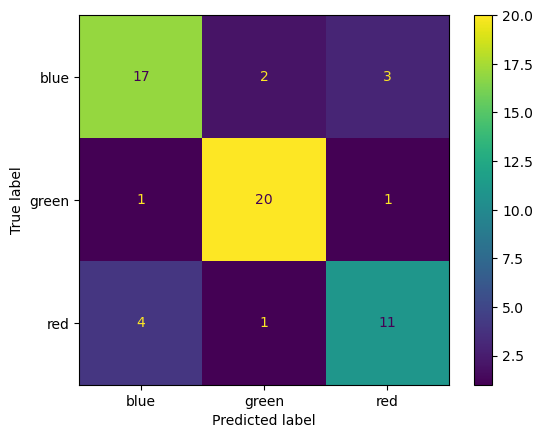

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# assume y_test are the true labels and compare to y_pred
y_true = y_test

# calculate accuracy
accuracy = accuracy_score(y_true,y_pred)
print(f'accuracy: {accuracy}')

# calculate confusion matrix
party_labels = knn.classes_

conf_matrix = confusion_matrix(y_true,y_pred,labels = party_labels)

# plot confusion matrix
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels = party_labels)
fig,ax = plt.subplots()
cmd.plot(ax = ax)

# calculate precision
precision = precision_score(y_true,y_pred, average = 'macro')
print(f'precision: {precision:.5f}')

# calculate recall
recall = recall_score(y_true, y_pred, average = 'macro')
print(f'recall: {recall:.5f}')

### Exercise 2:

Using the predictions and the testing set from when you calculated the labels using KNN, calculate the following accuracy metrics:

- accuracy
- confusion matrix (also plot it)
- precision
- recall

# CROSS VALIDATION

In [31]:
# apply cross validation here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# KNOWN DATA
fn_features = 'backyard_party.csv'
df = pd.read_csv(fn_features, usecols = [1,2,3])
data = df.to_numpy(dtype = object)

# now put into X and y
X = data[:,0:2]
y = data[:,2]

# set up knn model
knn = KNeighborsClassifier(n_neighbors = 10)

# define kfold object
num_splits = 5 # this is the K in k-folds, so the number of folds
kfold = KFold(n_splits = num_splits, shuffle = True, random_state = 42)

# use cross_val_score for K-fold cross-validation with accuracy scoring
accuracy_scores = cross_val_score(knn,X,y,cv = kfold, scoring = 'accuracy')

# print accuracy scores and mean accuracy
print(f'accuracy scores = {accuracy_scores}')
print(f'< accuracy > = {np.mean(accuracy_scores)}')

accuracy scores = [0.81666667 0.86666667 0.93333333 0.91666667 0.91666667]
< accuracy > = 0.89


# HYPERPARAMETER TUNING

In [34]:
np.shape(X)
np.sqrt(300)
np.arange(3,30)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [36]:
# apply hyperparameter tuning to determine best value for K in KNN

from sklearn.model_selection import GridSearchCV

# define hyperparameters and their range
param_grid = {'n_neighbors': np.arange(3,31)}

# create gridsearchcv object
grid_search = GridSearchCV(estimator = KNeighborsClassifier(metric = 'euclidean'),
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5)

# KNOWN DATA
fn_features = 'backyard_party.csv'
df = pd.read_csv(fn_features, usecols = [1,2,3])
data = df.to_numpy(dtype = object)

# now put into X and y
X = data[:,0:2]
y = data[:,2]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state = 42)

grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 11}


### Exercise 3:

Using your optimized KNN model, apply this model to predict the labels of the unknown backyard party dataset (using the file 'backyard_party_new_friends.csv').

Plot the known datapoints as somewhat transparent circles, and plot the unknown (but now predicted) datapoints as squares.

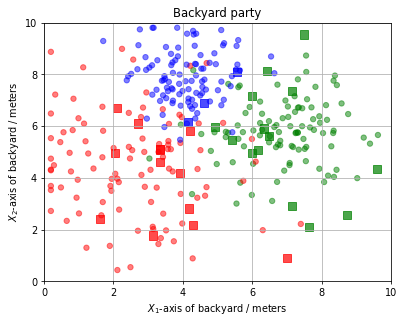

In [39]:
# use KNN model to make predictions and plot the results here

K_optimized = best_params['n_neighbors']

'''
load data
'''

# KNOWN DATA
fn_features = 'backyard_party.csv'
df = pd.read_csv(fn_features,usecols = [1,2,3])
data = df.to_numpy(dtype=object)

X = data[:,0:2]
y = data[:,2]

# UNKNOWN DATA
fn_new_data = 'backyard_party_new_friends.csv'
df_nd = pd.read_csv(fn_new_data,usecols = [1,2])

X_new = df_nd.to_numpy(dtype=object)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state = 42)

# now make predictions on the new unknown data and plot the results
knn = KNeighborsClassifier(n_neighbors = K_optimized, metric = 'euclidean')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_new)

plt.figure(dpi = 70)

# Create the scatter plot with custom colors
plt.scatter(X_new[:,0],X_new[:,1],c = y_pred, marker = 's', s = 70, alpha = 0.7)
plt.scatter(X[:,0],X[:,1],c = y, s = 30, alpha = 0.5)

# Add labels and title
plt.xlabel(r'$X_1$-axis of backyard / meters')
plt.ylabel(r'$X_2$-axis of backyard / meters')
plt.title('Backyard party')

plt.xlim([0,10]);plt.ylim([0,10])

plt.grid()
plt.show()